## Bibliotecas

In [35]:
# Import libs (Rodar sempre)

import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import t
import scipy

## Configurações

In [36]:
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

## Importando Dataset

In [37]:
# Import datasets (Rodar sempre)

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

#Naming and set path to dataframe
dataset_name_gweather = 'GlobalWeather.csv'
dataset_name_gweather_path = 'gdrive/MyDrive/datasets/'+dataset_name_gweather

#Initialize dataframe
sample_gweather = pd.read_csv(dataset_name_gweather_path)

gweather_df = sample_gweather

Mounted at /content/gdrive


## World Weather Repository ( Daily Updating )

### Real-Time Data with Daily Updates | Everyday Weather Analysis Made Easy

link: https://www.kaggle.com/datasets/nelgiriyewithana/global-weather-repository/

### Informações das colunas

*   country: Country of the weather data
*   location_name: Name of the location (city)
*   latitude: Latitude coordinate of the location
*   longitude: Longitude coordinate of the location
*   timezone: Timezone of the location
*   last_updated_epoch: Unix timestamp of the last data update
*   last_updated: Local time of the last data update
*   temperature_celsius: Temperature in degrees Celsius
*   temperature_fahrenheit: Temperature in degrees Fahrenheit
*   condition_text: Weather condition description
*   wind_mph: Wind speed in miles per hour
*   wind_kph: Wind speed in kilometers per hour
*   wind_degree: Wind direction in degrees
*   wind_direction: Wind direction as a 16-point compass
*   pressure_mb: Pressure in millibars
*   pressure_in: Pressure in inches
*   precip_mm: Precipitation amount in millimeters
*   precip_in: Precipitation amount in inches
*   humidity: Humidity as a percentage
*   cloud: Cloud cover as a percentage
*   feels_like_celsius: Feels-like temperature in Celsius
*   feels_like_fahrenheit: Feels-like temperature in Fahrenheit
*   visibility_km: Visibility in kilometers
*   visibility_miles: Visibility in miles
*   uv_index: UV Index
*   gust_mph: Wind gust in miles per hour
*   gust_kph: Wind gust in kilometers per hour
*   air_quality_Carbon_Monoxide: Air quality measurement: Carbon Monoxide
*   air_quality_Ozone: Air quality measurement: Ozone
*   air_quality_Nitrogen_dioxide: Air quality measurement: Nitrogen Dioxide
*   air_quality_Sulphur_dioxide: Air quality measurement: Sulphur Dioxide
*   air_quality_PM2.5: Air quality measurement: PM2.5
*   air_quality_PM10: Air quality measurement: PM10
*   air_quality_us-epa-index: Air quality measurement: US EPA Index
*   air_quality_gb-defra-index: Air quality measurement: GB DEFRA Index
*   sunrise: Local time of sunrise
*   sunset: Local time of sunset
*   moonrise: Local time of moonrise
*   moonset: Local time of moonset
*   moon_phase: Current moon phase
*   moon_illumination: Moon illumination percentage



In [38]:
gweather_df

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,wind_mph,wind_kph,wind_degree,wind_direction,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1693301400,2023-08-29 14:00,28.8,83.8,Sunny,7.2,11.5,74,ENE,1004.0,29.64,0.00,0.00,19,0,26.7,80.1,10.0,6.0,7.0,8.3,13.3,647.5,130.2,1.2,0.4,7.9,11.1,1,1,05:24 AM,06:24 PM,05:39 PM,02:48 AM,Waxing Gibbous,93
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1693301400,2023-08-29 11:30,27.0,80.6,Partly cloudy,3.8,6.1,210,SSW,1006.0,29.71,0.00,0.00,54,75,28.0,82.3,10.0,6.0,6.0,7.4,11.9,433.9,104.4,3.6,1.8,28.2,29.6,2,3,06:04 AM,07:19 PM,06:50 PM,03:25 AM,Waxing Gibbous,93
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1693301400,2023-08-29 10:30,28.0,82.4,Partly cloudy,8.1,13.0,240,WSW,1014.0,29.94,0.00,0.00,30,25,27.4,81.3,10.0,6.0,7.0,3.4,5.4,647.5,16.6,63.1,12.6,6.4,7.9,1,1,06:16 AM,07:21 PM,06:46 PM,03:50 AM,Waxing Gibbous,93
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1693301400,2023-08-29 11:30,10.2,50.4,Sunny,6.0,9.7,345,NNW,1015.0,29.97,0.00,0.00,51,6,8.9,48.0,10.0,6.0,4.0,7.4,11.9,190.3,68.0,0.2,0.2,0.5,0.8,1,1,07:16 AM,08:34 PM,08:08 PM,04:38 AM,Waxing Gibbous,93
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1693301400,2023-08-29 10:30,25.0,77.0,Partly cloudy,2.2,3.6,270,W,1016.0,30.00,0.00,0.00,69,75,26.9,80.4,10.0,6.0,6.0,3.6,5.8,2136.2,147.3,52.8,26.9,139.6,203.3,4,10,06:11 AM,06:06 PM,04:43 PM,04:41 AM,Waxing Gibbous,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13440,Venezuela,Caracas,10.50,-66.92,America/Caracas,1699214400,2023-11-05 16:00,31.0,87.8,Partly cloudy,6.9,11.2,20,NNE,1011.0,29.85,1.01,0.04,66,75,40.8,105.5,10.0,6.0,5.0,1.7,2.7,427.3,30.0,35.0,40.1,16.6,16.9,2,2,06:19 AM,06:03 PM,12:11 AM,01:08 PM,Last Quarter,53
13441,Vietnam,Hanoi,21.03,105.85,Asia/Bangkok,1699214400,2023-11-06 03:00,25.0,77.0,Mist,6.9,11.2,100,E,1013.0,29.91,0.03,0.00,100,75,27.7,81.8,5.0,3.0,1.0,7.3,11.7,961.3,0.5,45.9,23.4,41.4,56.9,3,4,06:01 AM,05:19 PM,11:49 PM,12:36 PM,Last Quarter,53
13442,Yemen,Sanaa,15.35,44.21,Asia/Aden,1699214400,2023-11-05 23:00,16.3,61.3,Partly cloudy,7.2,11.5,74,ENE,1019.0,30.08,0.00,0.00,47,46,16.3,61.3,10.0,6.0,1.0,8.2,13.2,247.0,56.5,9.4,12.2,41.8,104.6,3,4,06:01 AM,05:33 PM,No moonrise,12:39 PM,Last Quarter,53
13443,Zambia,Lusaka,-15.42,28.28,Africa/Lusaka,1699214400,2023-11-05 22:00,25.7,78.2,Clear,8.1,13.0,92,E,1011.0,29.85,0.00,0.00,29,0,25.1,77.2,10.0,6.0,1.0,15.0,24.1,1014.7,32.5,4.5,5.1,11.0,17.3,1,1,05:29 AM,06:12 PM,12:25 AM,11:53 AM,Last Quarter,53


## Informações e Utilitários

In [39]:
# Para visualizar os dados ordenados pela data de tiragem
df_sorted_by_date = gweather_df.sort_values(by='last_updated_epoch')
df_sorted_by_date

# Visualizar colunas
gweather_df.columns

# Resgatar apenas brasil
gweather_df[gweather_df['country'] == 'Brazil'].head(10)

# Filtrando apenas paises das americas
filtered_df = gweather_df[gweather_df['timezone'].str.startswith('America/')]
filtered_df

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,wind_mph,wind_kph,wind_degree,wind_direction,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
5,Antigua and Barbuda,Saint John's,17.12,-61.85,America/Antigua,1693301400,2023-08-29 05:30,29.0,84.2,Light rain,9.4,15.1,90,E,1015.0,29.97,0.30,0.01,79,75,34.0,93.2,10.0,6.0,1.0,23.3,37.4,200.3,16.6,0.5,0.5,0.8,1.9,1,1,05:53 AM,06:23 PM,05:36 PM,04:09 AM,Waxing Gibbous,93
6,Argentina,Buenos Aires,-34.59,-58.67,America/Argentina/Buenos_Aires,1693301400,2023-08-29 06:30,9.0,48.2,Clear,6.9,11.2,70,ENE,1023.0,30.21,0.00,0.00,71,0,8.0,46.4,10.0,6.0,1.0,8.5,13.7,270.4,18.8,10.7,1.3,2.1,3.5,1,1,07:18 AM,06:34 PM,04:57 PM,06:32 AM,Waxing Gibbous,93
11,Bahamas,Nassau,25.08,-77.35,America/Nassau,1693301400,2023-08-29 05:30,29.8,85.6,Clear,8.9,14.4,215,SW,1012.0,29.87,0.00,0.00,80,8,36.6,97.9,10.0,6.0,1.0,12.3,19.8,220.3,29.3,1.0,1.2,1.4,2.1,1,1,06:49 AM,07:32 PM,06:53 PM,04:58 AM,Waxing Gibbous,93
14,Barbados,Bridgetown,13.10,-59.62,America/Barbados,1693301400,2023-08-29 05:30,27.0,80.6,Partly cloudy,16.1,25.9,90,E,1013.0,29.91,0.40,0.02,89,25,30.0,86.0,10.0,6.0,1.0,26.8,43.2,201.9,17.7,0.8,0.7,1.6,3.5,1,1,05:47 AM,06:11 PM,05:20 PM,04:07 AM,Waxing Gibbous,93
17,Belize,Belmopan,17.25,-88.77,America/Belize,1693301400,2023-08-29 03:30,23.6,74.5,Patchy rain possible,4.3,6.8,233,SW,1009.0,29.78,0.70,0.03,95,70,26.1,79.0,9.0,5.0,1.0,7.6,12.2,161.9,6.6,0.4,0.1,2.8,2.9,1,1,05:41 AM,06:11 PM,05:28 PM,04:01 AM,Waxing Gibbous,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13417,Suriname,Paramaribo,5.83,-55.17,America/Paramaribo,1699214400,2023-11-05 17:00,29.6,85.3,Sunny,11.0,17.6,38,NE,1006.0,29.70,0.00,0.00,68,20,33.8,92.9,10.0,6.0,7.0,14.5,23.4,277.0,25.0,0.0,0.1,1.9,6.6,1,1,06:27 AM,06:21 PM,12:31 AM,01:12 PM,Last Quarter,53
13427,Trinidad and Tobago,Port Of Spain,10.65,-61.52,America/Port_of_Spain,1699214400,2023-11-05 16:00,28.0,82.4,Overcast,6.9,11.2,110,ESE,1007.0,29.74,0.49,0.02,89,50,31.8,89.2,10.0,6.0,6.0,10.2,16.4,287.1,22.9,13.0,1.1,0.8,1.1,1,1,05:58 AM,05:41 PM,No moonrise,12:46 PM,Last Quarter,53
13436,United States of America,Washington Park,46.60,-120.49,America/Los_Angeles,1699214400,2023-11-05 12:00,10.0,50.0,Sunny,3.8,6.1,50,NE,1012.0,29.88,0.00,0.00,74,0,10.3,50.5,16.0,9.0,4.0,2.3,3.7,303.8,38.6,10.1,0.3,3.1,3.8,1,1,07:50 AM,05:41 PM,No moonrise,03:03 PM,Last Quarter,53
13437,Uruguay,Montevideo,-34.86,-56.17,America/Montevideo,1699214400,2023-11-05 17:00,24.0,75.2,Sunny,8.1,13.0,360,N,1016.0,30.00,0.00,0.00,44,0,25.3,77.5,10.0,6.0,5.0,13.9,22.4,297.1,64.4,4.7,6.6,2.1,3.5,1,1,05:39 AM,07:18 PM,01:55 AM,12:04 PM,Last Quarter,53


# Análises

## Estatistica Descritiva (2,0)

- Box plot
- Histrograma
- Scatter plot
- Mapa de calor para correlação (heatmap)

### Box plot

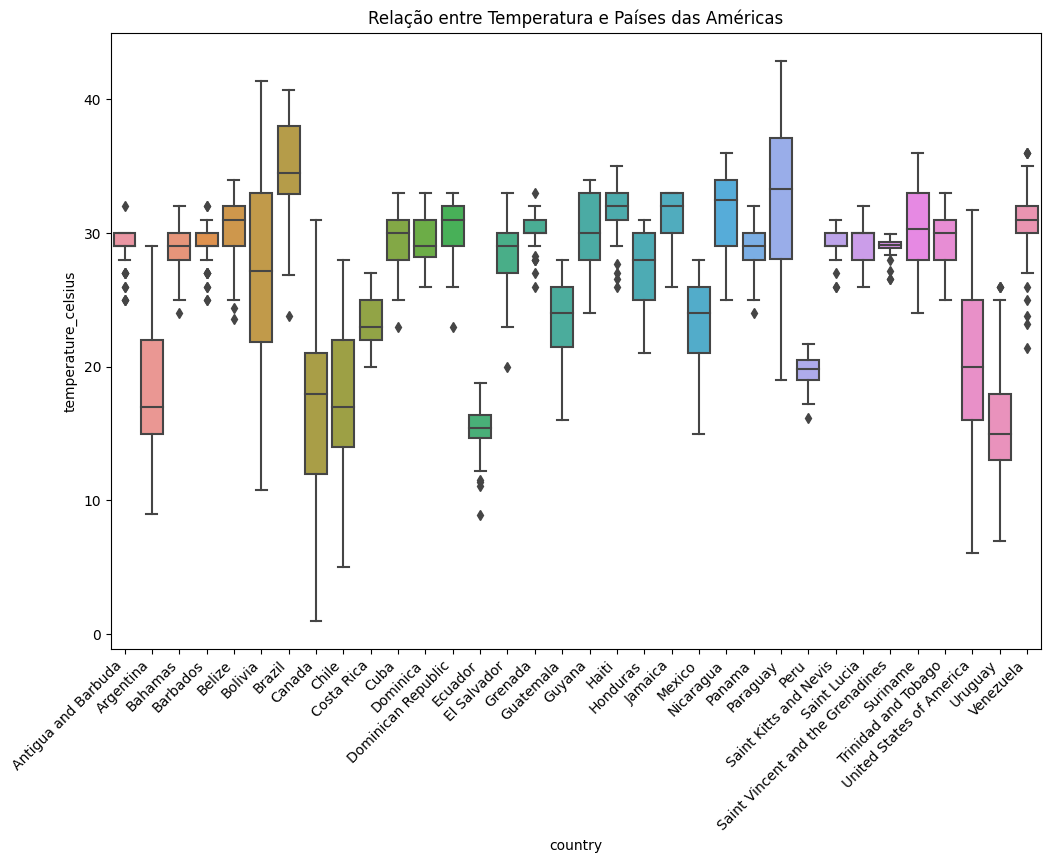

In [40]:
filtered_df = gweather_df[gweather_df['timezone'].str.startswith('America/')]
filtered_df

plt.figure(figsize=(12, 8))
sns.boxplot(x='country', y='temperature_celsius', data=filtered_df)
plt.xticks(rotation=45, ha='right')
plt.title('Relação entre Temperatura e Países das Américas')
plt.show()

In [41]:
fig = px.scatter_mapbox(
    data_frame=filtered_df,
    lat="latitude", lon="longitude",
    hover_name="location_name",
    hover_data=["country", "last_updated", "timezone"],
    color_continuous_scale=px.colors.cyclical.IceFire,
    color="temperature_celsius",
    size="temperature_fahrenheit",
    size_max=10,
    opacity=0.4,
    height=450,
    width=900,
    zoom=1
    )

fig.add_trace(go.Scattermapbox(
    mode='lines',
    lon=[-180, 180],
    lat=[0, 0],
    marker=dict(opacity=0)
))

fig.add_trace(go.Scattermapbox(
    mode='lines',
    lon=[-180, 180],
    lat=[23.5, 23.5],
    marker=dict(opacity=0)
))

fig.add_trace(go.Scattermapbox(
    mode='lines',
    lon=[-180, 180],
    lat=[-23.5, -23.5],
    marker=dict(opacity=0)
))
fig.update_layout(mapbox_style='carto-positron')
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})




fig.show()

### Histograma

Histograma de tendência de temperaturas dos países mais quentes e mais frios das Americas

In [42]:
media_temperatura = filtered_df.groupby(['country', 'location_name'])['temperature_celsius'].mean().reset_index()

top10_paises_mais_quentes_americas = media_temperatura.sort_values(by='temperature_celsius', ascending=False).head(10)
top10_paises_mais_frios_americas = media_temperatura.sort_values(by='temperature_celsius', ascending=True).head(10)

In [43]:
fig = px.histogram(top10_paises_mais_frios_americas, x='country', y='temperature_celsius', nbins=30, marginal='rug',
                   labels={'count': 'Contagem', 'temperature_celsius': 'Temperatura °C'},
                   title='Histograma dos países de temperaturas mais baixas das Americas',
                   hover_data=['country', 'location_name', 'temperature_celsius'])

fig.show()

In [44]:
fig = px.histogram(top10_paises_mais_quentes_americas, x='country', y='temperature_celsius', nbins=30, marginal='rug',
                   labels={'count': 'Contagem', 'temperature_celsius': 'Temperatura °C'},
                   title='Histograma dos países de temperaturas mais altas das Americas',
                   hover_data=['country', 'location_name', 'temperature_celsius'])

fig.show()

Histogramas de temperaturas no Brasil, no estado do Amazonas, com marginalização indicando data da temperatura, sensação termica e indíce UV

In [45]:
brasilia_data = gweather_df[gweather_df['location_name'] == 'Bras']

fig = px.histogram(brasilia_data, x='temperature_celsius', nbins=30, marginal='rug',
                   labels={'temperature_celsius': 'Temperatura °C', 'count': 'Contagem'},
                   title='Histograma de Temperaturas no Brasil, no Amazonas',
                   hover_data=['last_updated', 'uv_index', 'feels_like_celsius'])

fig.show()

### Scatterplot

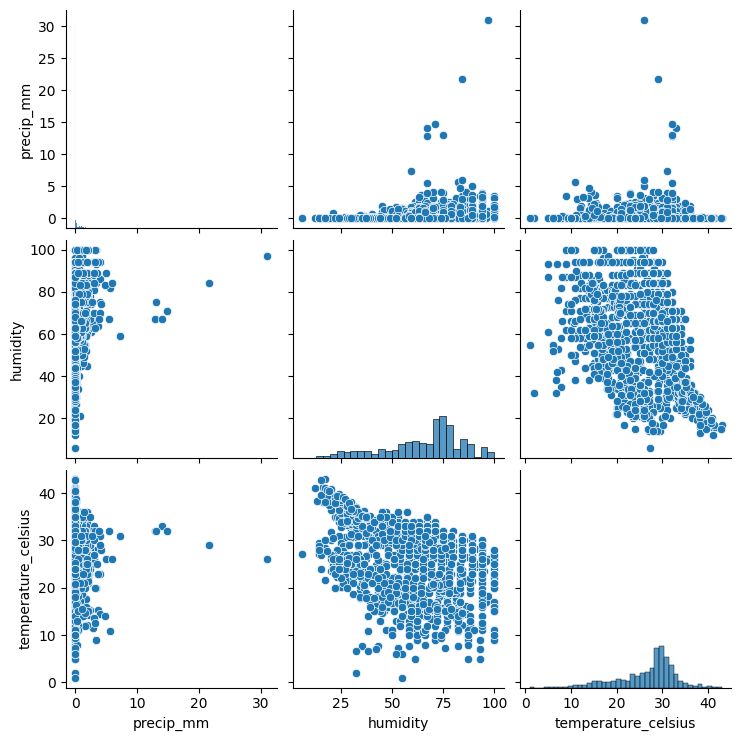

In [46]:
preci_temp = ['precip_mm', 'humidity', 'temperature_celsius']

sns.pairplot(filtered_df[preci_temp])

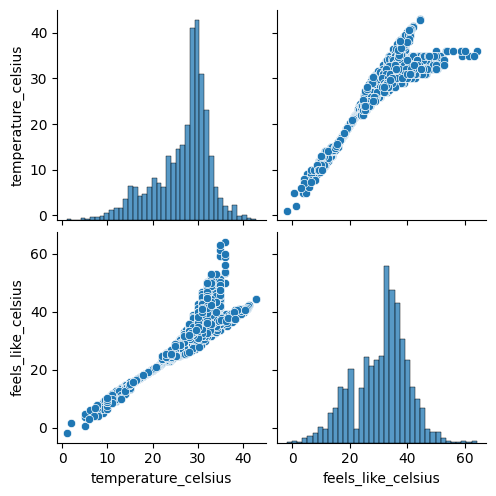

In [47]:
calor = ['temperature_celsius', 'feels_like_celsius']
sns.pairplot(filtered_df[calor])

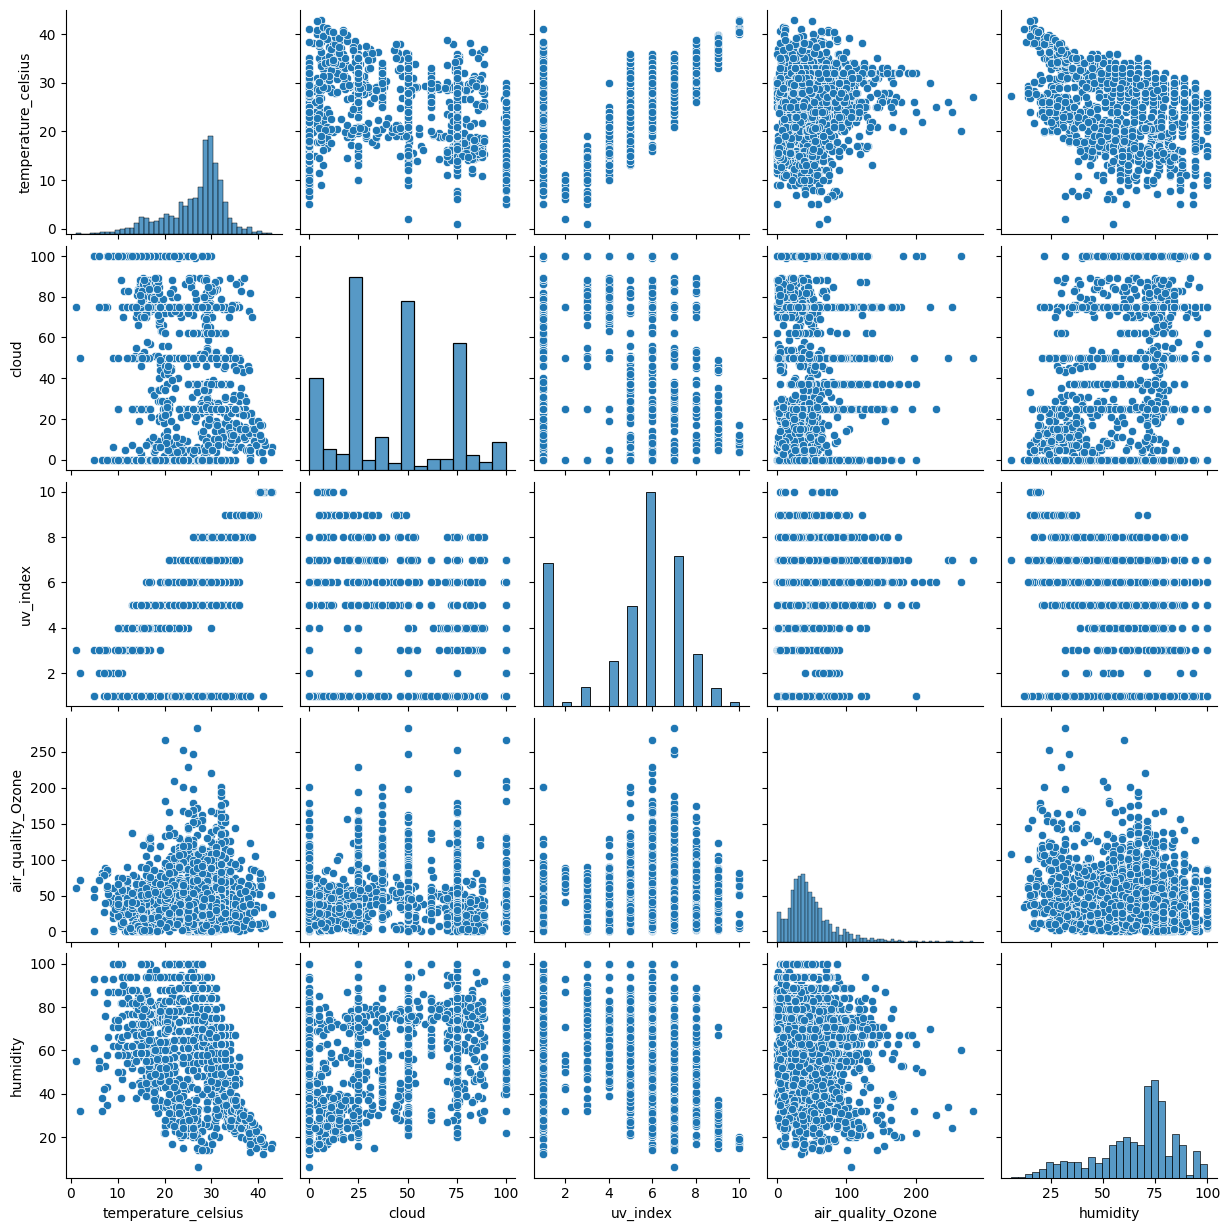

In [48]:
uv_mais_parametros = ['temperature_celsius', 'cloud', 'uv_index', 'air_quality_Ozone', 'humidity']
sns.pairplot(filtered_df[uv_mais_parametros])

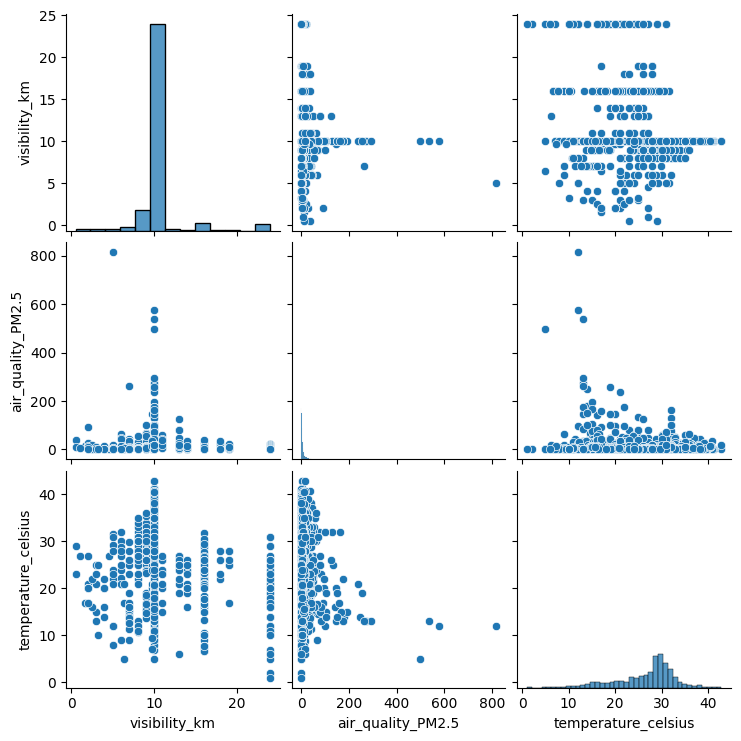

In [49]:
visibilidade = ['visibility_km', 'air_quality_PM2.5', 'temperature_celsius']
sns.pairplot(filtered_df[visibilidade])

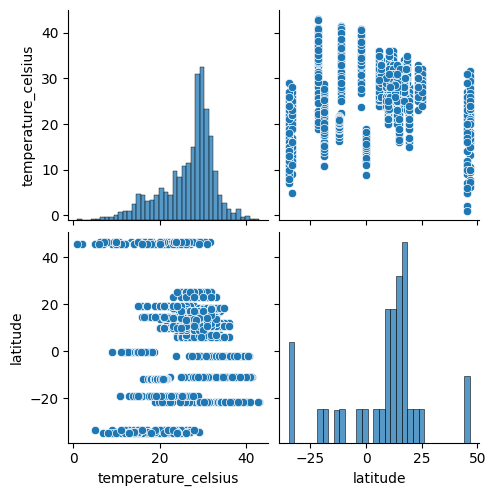

In [50]:
temperatura = ['temperature_celsius', 'latitude']
sns.pairplot(filtered_df[temperatura])

In [51]:
temp_sens = gweather_df[['temperature_celsius', 'feels_like_celsius']].corr()
temp_sens

,temperature_celsius,feels_like_celsius
temperature_celsius,1.000000,0.975349
feels_like_celsius,0.975349,1.000000


### Correlação e heatmap

In [52]:
temp_sens = gweather_df[['temperature_celsius', 'feels_like_celsius']].corr()
temp_sens

,temperature_celsius,feels_like_celsius
temperature_celsius,1.000000,0.975349
feels_like_celsius,0.975349,1.000000


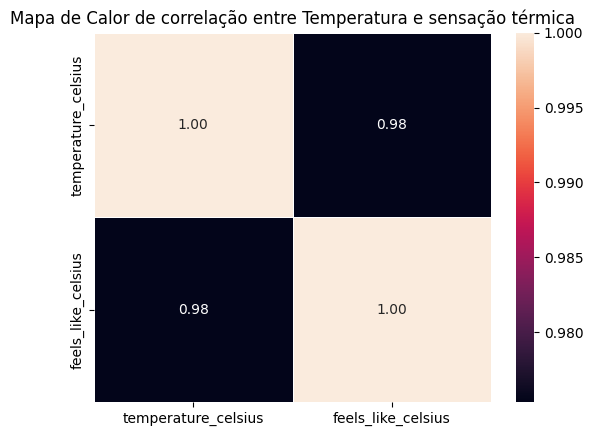

In [53]:
sns.heatmap(temp_sens, annot=True, fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor de correlação entre Temperatura e sensação térmica')
plt.show()

In [54]:
temp_lat = gweather_df[['temperature_celsius', 'latitude']].corr()
temp_lat

,temperature_celsius,latitude
temperature_celsius,1.000000,-0.414807
latitude,-0.414807,1.000000


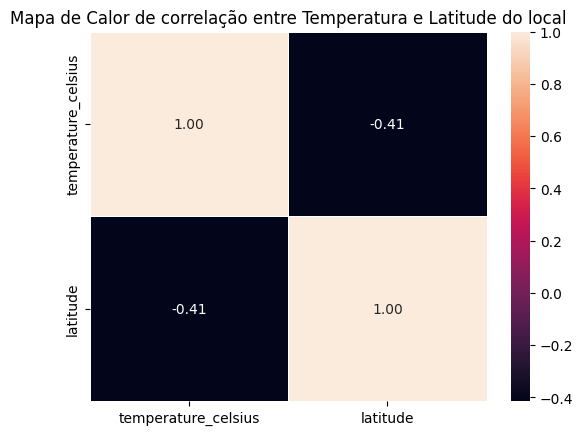

In [55]:
sns.heatmap(temp_lat, annot=True, fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor de correlação entre Temperatura e Latitude do local')
plt.show()

In [56]:
raios_uv = gweather_df[['uv_index', 'temperature_celsius', 'air_quality_Ozone', 'air_quality_Carbon_Monoxide', 'cloud', 'humidity']].corr()
raios_uv

,uv_index,temperature_celsius,air_quality_Ozone,air_quality_Carbon_Monoxide,cloud,humidity
uv_index,1.000000,0.415342,0.128291,-0.058859,0.191778,-0.124990
temperature_celsius,0.415342,1.000000,0.100403,0.051465,0.021196,-0.234230
air_quality_Ozone,0.128291,0.100403,1.000000,-0.201248,-0.090714,-0.296887
air_quality_Carbon_Monoxide,-0.058859,0.051465,-0.201248,1.000000,-0.024757,0.060324
cloud,0.191778,0.021196,-0.090714,-0.024757,1.000000,0.373084
humidity,-0.124990,-0.234230,-0.296887,0.060324,0.373084,1.000000


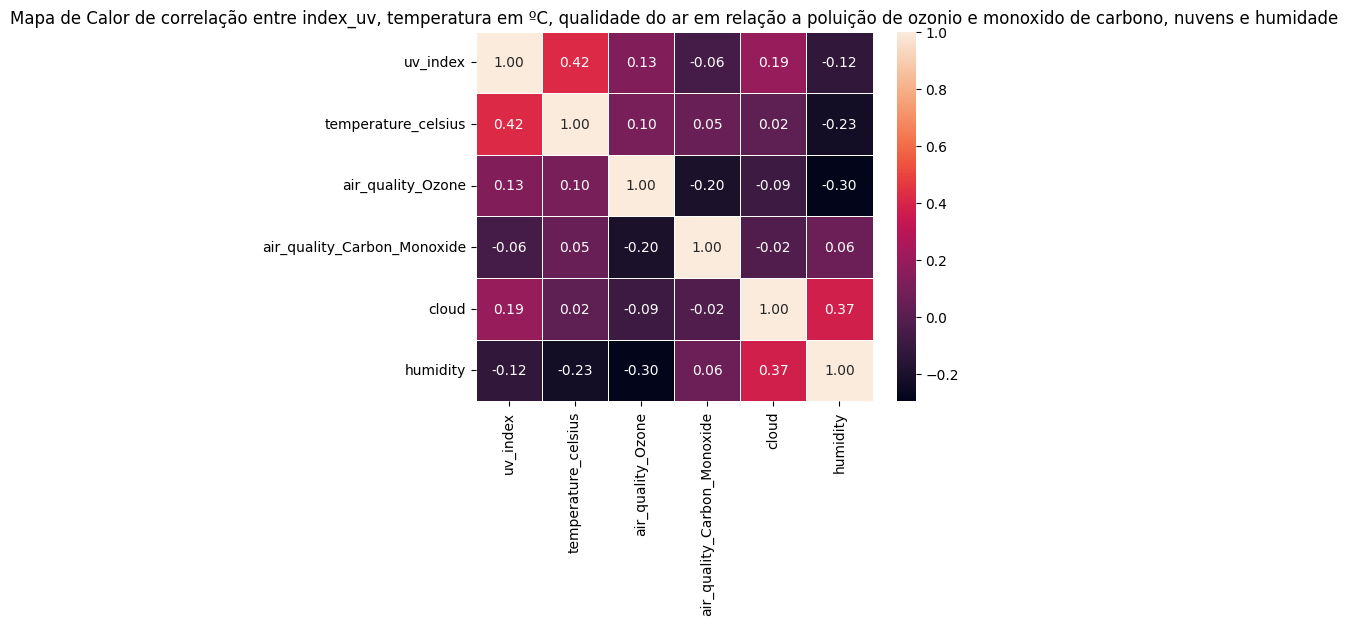

In [57]:
sns.heatmap(raios_uv, annot=True, fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor de correlação entre index_uv, temperatura em ºC, qualidade do ar em relação a poluição de ozonio e monoxido de carbono, nuvens e humidade')
plt.show()

Mapa de calor mundial da qualidade de ar das cidades ao redor do globo

In [58]:
fig = px.scatter_mapbox(
    data_frame=gweather_df,
    lat="latitude", lon="longitude",
    hover_name="location_name",
    hover_data=["country", "last_updated", "timezone"],
    color_continuous_scale=px.colors.cyclical.IceFire,
    color="air_quality_PM2.5",
    size="air_quality_PM2.5",
    size_max=40,
    opacity=0.4,
    height=450,
    width=900,
    zoom=1
    )

fig.update_layout(mapbox_style='carto-positron')
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})

fig.show()

Mapa de calor da qualidade do ar das Americas

In [59]:
fig = px.scatter_mapbox(
    data_frame=filtered_df,
    lat="latitude", lon="longitude",
    hover_name="location_name",
    hover_data=["country", "last_updated", "timezone"],
    color_continuous_scale=px.colors.cyclical.IceFire,
    color="air_quality_PM2.5",
    size="air_quality_PM2.5",
    size_max=40,
    opacity=0.4,
    height=450,
    width=900,
    zoom=1.2
    )

fig.update_layout(mapbox_style='carto-positron')
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})

fig.show()

Mapa de calor da temperatura em função do tempo no estado do Amazonas

In [60]:
fig = px.imshow(brasilia_data.pivot_table(index='last_updated', columns='location_name', values='temperature_celsius'),
                title='Mapa de Calor das Temperaturas do Amazonas')


fig.show()



fig = px.scatter_mapbox(
    data_frame=brasilia_data,
    lat="latitude", lon="longitude",
    hover_name="location_name",
    hover_data=["country", "last_updated", "timezone"],
    color_continuous_scale="jet",
    color="temperature_celsius",
    size="temperature_celsius",
    size_max=40,
    opacity=0.05,
    height=500,
    width=1000,
    zoom=3
    )

fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})

fig.show()

## Normal Padrão (1,0)

Seguindo exemplo de normalização realizado em aula, aplique a normalização em
ao menos duas variáveis (colunas) do seu dataset. Apresentando o dataframe com os
valores normalizados (normal padrão).

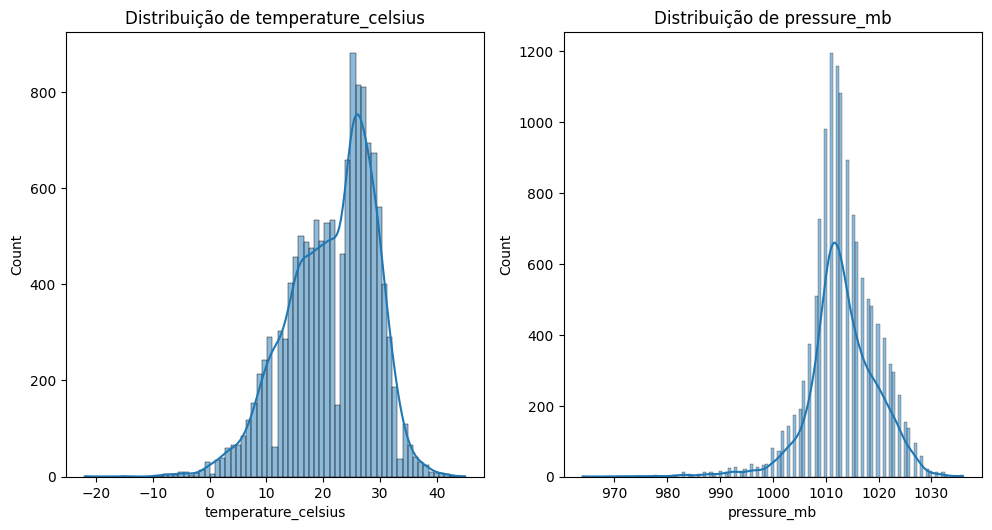

In [61]:
variaveis_climaticas = [
    'temperature_celsius',
    'pressure_mb',
]


plt.figure(figsize=(15, 10))

for i, variavel in enumerate(variaveis_climaticas, 1):
    plt.subplot(2, 3, i)
    sns.histplot(gweather_df[variavel], kde=True)
    plt.title(f'Distribuição de {variavel}')

plt.tight_layout()
plt.show()

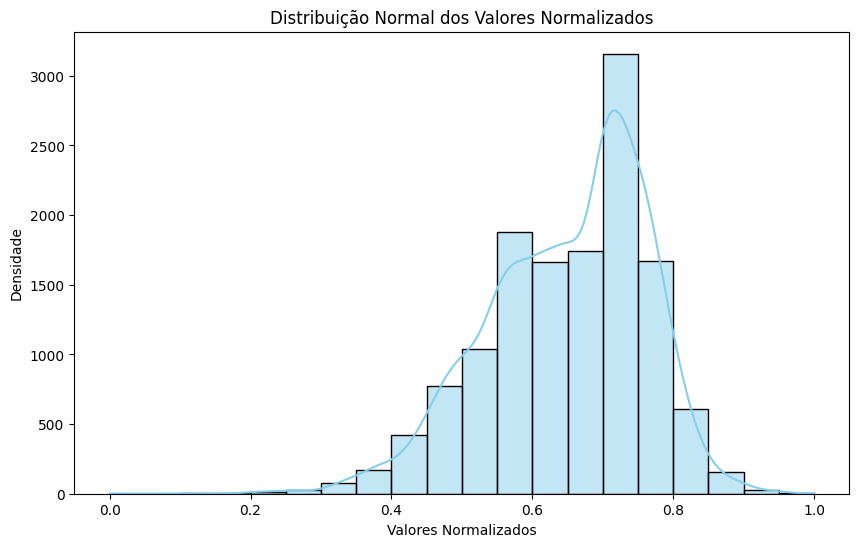

In [62]:
copy_df = gweather_df.copy()

min_temp = copy_df['temperature_celsius'].min()
max_temp = copy_df['temperature_celsius'].max()
copy_df['normalized_temperature_celsius'] = (copy_df['temperature_celsius'] - min_temp) / (max_temp - min_temp)

plt.figure(figsize=(10, 6))
sns.histplot(copy_df['normalized_temperature_celsius'], kde=True, color='skyblue', bins=20)
plt.title('Distribuição Normal dos Valores Normalizados')
plt.xlabel('Valores Normalizados')
plt.ylabel('Densidade')
plt.show()

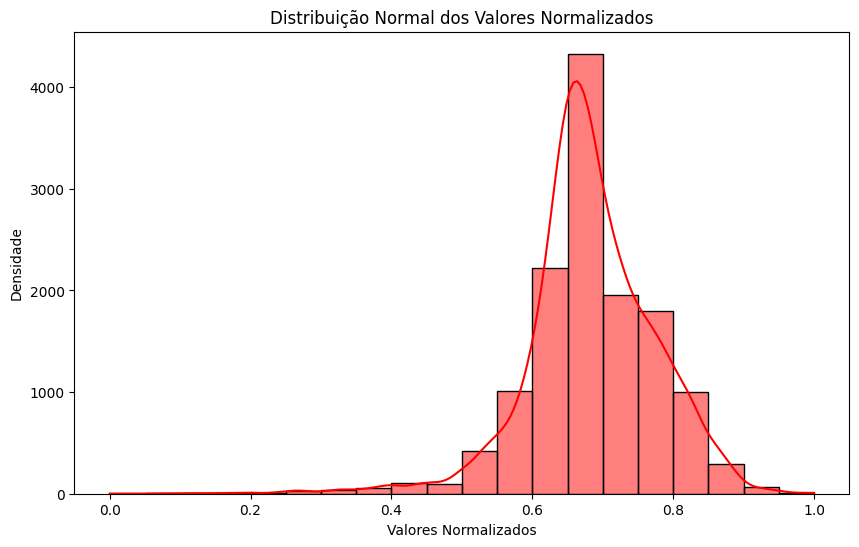

In [63]:
min_temp = copy_df['pressure_mb'].min()
max_temp = copy_df['pressure_mb'].max()
copy_df['normalized_pressure_mb'] = (copy_df['pressure_mb'] - min_temp) / (max_temp - min_temp)


plt.figure(figsize=(10, 6))
sns.histplot(copy_df['normalized_pressure_mb'], kde=True, color='red', bins=20)
plt.title('Distribuição Normal dos Valores Normalizados')
plt.xlabel('Valores Normalizados')
plt.ylabel('Densidade')
plt.show()

In [64]:
wished_columns = ['normalized_pressure_mb', 'normalized_temperature_celsius']
normalized_columns = copy_df[wished_columns]
normalized_columns

,normalized_pressure_mb,normalized_temperature_celsius
0,0.555556,0.758209
1,0.583333,0.731343
2,0.694444,0.746269
3,0.708333,0.480597
4,0.722222,0.701493
...,...,...
13440,0.652778,0.791045
13441,0.680556,0.701493
13442,0.763889,0.571642
13443,0.652778,0.711940


## Distribuições Amostrais (1,5)

Seguindo o exemplo de distribuição amostral das médias apresentado em sala de
aula, crie distribuições amostrais das médias para um evento da sua base de dados,
variando o tamanho das amostras a partir de 1 até no mínimo em três tamanhos da
população. Apresente gráficos mostrando a evolução da distribuição amostral da
média à medida que o tamanho da amostra aumenta. Interprete os resultados obtidos.

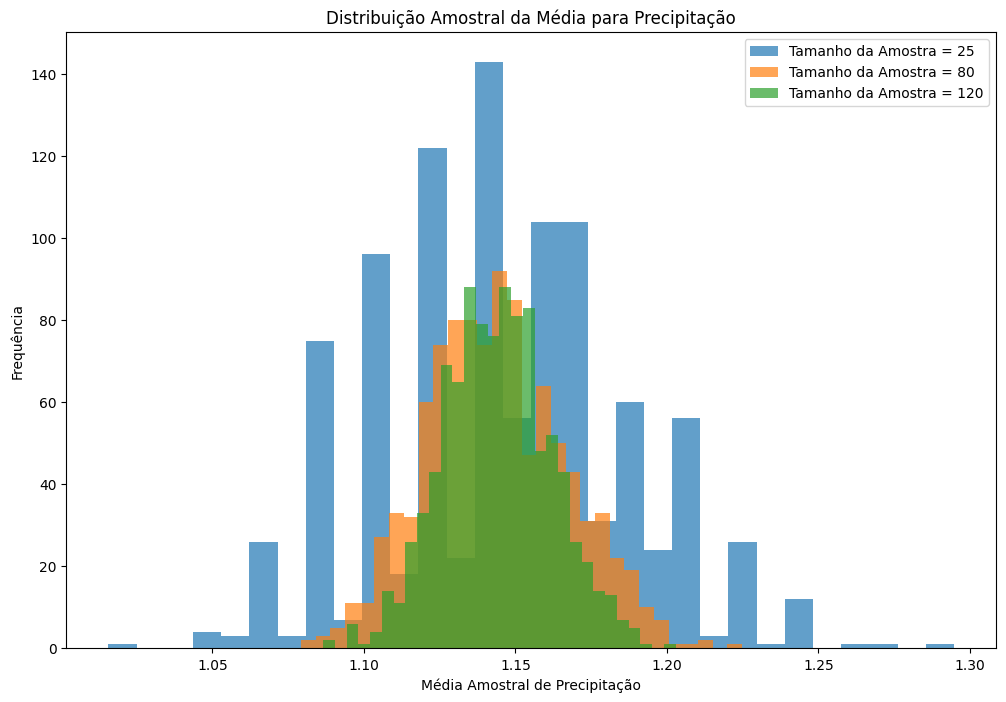

In [65]:
media_temperatura = filtered_df.groupby(['country', 'location_name'])['precip_mm'].mean().reset_index()

filtered_top3_df = media_temperatura.sort_values(by='precip_mm', ascending=False).head(3)

variavel_evento = 'precip_mm'

tamanhos_amostra = [25, 80, 120]

num_repeticoes = 1000

plt.figure(figsize=(12, 8))
plt.title('Distribuição Amostral da Média para Precipitação')

for tamanho_amostra in tamanhos_amostra:
    medias_amostrais = []

    for _ in range(num_repeticoes):
        amostra = filtered_top3_df[variavel_evento].sample(tamanho_amostra, replace=True)

        media_amostral = amostra.mean()
        medias_amostrais.append(media_amostral)

    plt.hist(medias_amostrais, bins=30, alpha=0.7, label=f'Tamanho da Amostra = {tamanho_amostra}')

plt.legend()
plt.xlabel('Média Amostral de Precipitação')
plt.ylabel('Frequência')


plt.show()

## Intervalo de Confiança (0,5)

Selecione uma variável aleatória discreta ou contínua que represente uma amostra e
encontre o Intervalo de Confiança (IC) de 90% e 95% para a média da população.

In [66]:
amostra = gweather_df['temperature_celsius'].dropna()

n = len(amostra)

mean = np.mean(amostra)

std_dev = np.std(amostra, ddof=1)

conf_levels = [0.90, 0.95]

degrees_of_freedom = n - 1

intervals = {}
for conf_level in conf_levels:
    alpha = 1 - conf_level
    critical_value = t.ppf(1 - alpha / 2, degrees_of_freedom)
    margin_of_error = critical_value * (std_dev / np.sqrt(n))
    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error
    intervals[conf_level] = (lower_bound, upper_bound)

for conf_level, interval in intervals.items():
    print(f"Intervalo de Confiança ({conf_level * 100}%): {interval}")

Intervalo de Confiança (90.0%): (21.425886395075697, 21.641752132257896)
Intervalo de Confiança (95.0%): (21.40520660138369, 21.662431925949903)


Intervalo de Confiança (90.0%): (21.425886395075697, 21.641752132257896)
Intervalo de Confiança (95.0%): (21.40520660138369, 21.662431925949903)


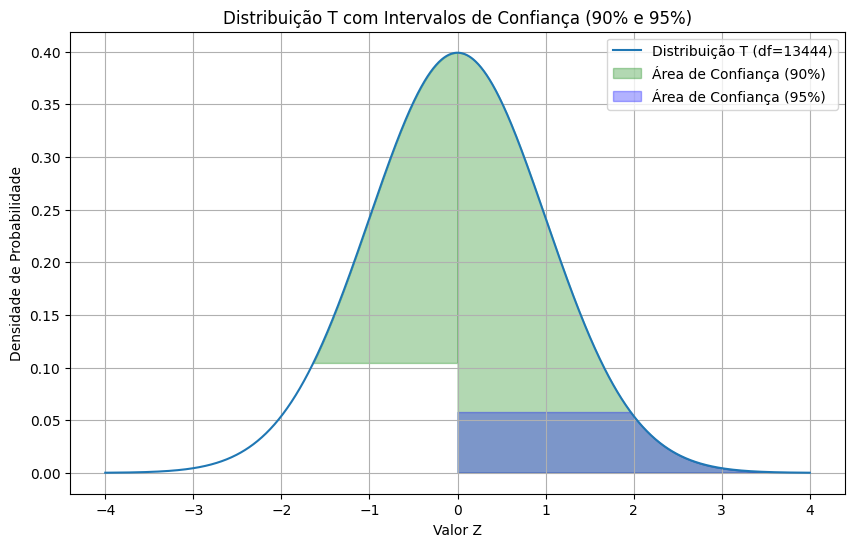

In [67]:
amostra = gweather_df['temperature_celsius'].dropna()
n = len(amostra)

mean = np.mean(amostra)

std_dev = np.std(amostra, ddof=1)

conf_levels = [0.90, 0.95]

degrees_of_freedom = n - 1

intervals = {}
for conf_level in conf_levels:
    alpha = 1 - conf_level
    critical_value = t.ppf(1 - alpha / 2, degrees_of_freedom)
    margin_of_error = critical_value * (std_dev / np.sqrt(n))
    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error
    intervals[conf_level] = (lower_bound, upper_bound)

for conf_level, interval in intervals.items():
    print(f"Intervalo de Confiança ({conf_level * 100}%): {interval}")

plt.figure(figsize=(10, 6))

df_t = degrees_of_freedom
x = np.linspace(-4, 4, 1000)
y = t.pdf(x, df_t, 0, 1)

plt.plot(x, y, label=f'Distribuição T (df={df_t})')

lower_ci_90 = mean + t.ppf(0.05, df_t) * (std_dev / np.sqrt(n))
upper_ci_90 = mean - t.ppf(0.05, df_t) * (std_dev / np.sqrt(n))
plt.fill_betweenx(y, x, where=(x > t.ppf(0.05, df_t)), color='green', alpha=0.3, label='Área de Confiança (90%)')

lower_ci_95 = mean + critical_value * (std_dev / np.sqrt(n))
upper_ci_95 = mean - critical_value * (std_dev / np.sqrt(n))
plt.fill_betweenx(y, x, where=(x > critical_value), color='blue', alpha=0.3, label='Área de Confiança (95%)')

plt.title('Distribuição T com Intervalos de Confiança (90% e 95%)')
plt.xlabel('Valor Z')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid(True)
plt.show()